In [1]:
import os
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

In [4]:
!unzip health.zip

Archive:  health.zip
   creating: health/.ipynb_checkpoints/
  inflating: health/1_marathilexnew.txt  
   creating: health/3. MAR-HEALTH/
   creating: health/3. MAR-HEALTH/MAR-HEALTH/
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0003_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0004_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0005_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0009_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0010_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0013_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0014_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0015_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0019_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0020_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0023_mar_health.txt  
  inflating: health/3. MAR-HEALTH/MAR-HEALTH/0024_mar_health.txt  
  inflating:

In [6]:
FILES_PATH1 = "/content/health/3. MAR-HEALTH/MAR-HEALTH"
FILES_PATH2 = "/content/health/Marathi Health Domain/Marathi Health Domain"
FILES_PATH3 = "/content/health/Health Domain (Training & Testing)/Health Training"
FILES_PATH4 = "/content/health/Health Domain (Training & Testing)/Health Testing"

In [7]:
all_lines0 = []
for i in os.listdir(FILES_PATH3):
    if i!=".ipynb_checkpoints":
        text_file = open(os.path.join(FILES_PATH3, i), "r", encoding="utf-8-sig")
        content = text_file.read()
        content = content.split("\n")
        lines = []
        for i in content:
            lines.append(i.split(" "))
        line_words = []
        for i in lines:
            words = []
            cleaned_words=[]
            for j in i:
                if "\\" in j:
                    words.append(j.split("\\"))
            all_lines0.append(words)

for i in os.listdir(FILES_PATH4):
    if i!=".ipynb_checkpoints":
        text_file = open(os.path.join(FILES_PATH4, i), "r", encoding="utf-8-sig")
        content = text_file.read()
        content = content.split("\n")
        lines = []
        for i in content:
            lines.append(i.split(" "))
        line_words = []
        for i in lines:
            words = []
            cleaned_words=[]
            for j in i:
                if "\\" in j:
                    words.append(j.split("\\"))
            all_lines0.append(words)            

In [8]:
for i in range(len(all_lines0)):
    for j in range(len(all_lines0[i])):
        if j==0:
            if len(all_lines0[i][j][0].split("\t"))==2:
                 all_lines0[i][j][0]=all_lines0[i][j][0].split("\t")[1]

In [9]:
all_lines0[20770]

[['हीच', 'DM_DMR'],
 ['त्याची', 'PR_PRP'],
 ['चालण्याची', 'V_VM'],
 ['सुरवात', 'N_NN'],
 ['असते.', 'V_VM']]

In [10]:
for i in range(len(all_lines0)):
    for j in range(len(all_lines0[i])):
      if len(all_lines0[i][j])!=2:
        all_lines0[i][j].remove(all_lines0[i][j][2])
        print(all_lines0[i][j])

['ल्यूटिन', 'N_NNP,']
['शरीर', 'N_NN,']
['नव्हता', 'V_VUAX.']
['रंग', 'N_NN,']
['सुगंध', 'N_NN,']
['तक्ता', 'N_NN,']
['', 'संप्रेरक']
['', 'मन']
['दिसते', 'V_VAM.']
['टाकून', 'N_NN,']
['शकतात', 'V_VAX.']
['जाते', 'V_VM']
['सायकल', 'N_NN,']
['परित्याग', 'N_NN', 'N_NN']
['लागणे', 'V_VM,']
['कार्यकर्त्यांची', 'PR_PRP']
['दुरुस्ती', 'N_NN', 'N_NN']
['शक्ती', 'N_NNचक्राच्या']
['(', 'RD_SYMकरा', 'RD_SYM,', 'RD_PUNC']
['साफ', 'JJ,']
['करा', 'V_VM,']
['साफ', 'JJ,']
['लेप', 'N_NN', 'N_NN']
['होतो', 'V_VM,']
['.', 'RD_PUNC']
['एक', 'QT_QTC-दोन']
['(', 'RD_SYMकीडा', 'RD_SYM']
['टाकतात', 'V_VM,']
['लावतात', 'V_VM,']
['उगवू', 'V_VM', 'V_VM']
['तर', 'CC_CCS,']
['४', 'QT_QTC-५']
['``बातमीनुसार', 'N_NN,']
['तरी', 'CC_CCS,']
['असला', 'V_VM,']
['वृद्ध', 'N_NN,']
['मुले', 'N_NN,']
['`', 'RD_PUNCसूत्रस्थानाचे']
['१', 'QT_QTC.']
['(', 'RD_SYMवात']
['कफ', 'N_NN)']
['आहे', 'V_VM,']
['(', 'RD_SYMसूक्ष्मजंतू', 'RD_SYM']
['आहे', 'V_VM,']
['जाणतो', 'V_VM,']
['सात्विक', 'JJ,']
['तामसिक', 'JJ,']
['प्रवृत्ति', 'N_N

In [11]:
for i in range(len(all_lines0)):
    for j in range(len(all_lines0[i])):
        if all_lines0[i][j][1]=='N_NN' or all_lines0[i][j][1]=='N_NN,' or all_lines0[i][j][1]=='N_NN':
                all_lines0[i][j][1]='n'
                    
        elif all_lines0[i][j][1]=='N_NST' or all_lines0[i][j][1]=='N_NN)' or all_lines0[i][j][1]=='N_NN’' or all_lines0[i][j][1]=='N_NN:' or all_lines0[i][j][1]=='N_NN`':      
            all_lines0[i][j][1]='n'
                
        elif all_lines0[i][j][1]=='N_NNP' or all_lines0[i][j][1]=='N_NNP,' or all_lines0[i][j][1]=='N_NN(':
            all_lines0[i][j][1]='n'
                
        elif all_lines0[i][j][1]=='JJ' or all_lines0[i][j][1]=='JJ,' or all_lines0[i][j][1]=='JJ.' or all_lines0[i][j][1]=='JJ(' or all_lines0[i][j][1]=='JJ':   
            all_lines0[i][j][1]='a'
                
        elif all_lines0[i][j][1]=='RB' or all_lines0[i][j][1]=='RB,':
            all_lines0[i][j][1]='r'
                    
        elif all_lines0[i][j][1]=='V_VM':   
            all_lines0[i][j][1]='v'
                
        elif all_lines0[i][j][1]=='V_VAUX':
            all_lines0[i][j][1]='r'    
                
        else: 
            all_lines0[i][j][1]='u'

In [12]:
all_lines0[2000]

[['जिला', 'u'],
 ['ह्रदयरोग', 'n'],
 ['असण्याचा', 'v'],
 ['धोका', 'n'],
 ['अहे', 'v'],
 ['.', 'u']]

In [13]:
all_lines = []
for i in os.listdir(FILES_PATH1):
    if i!=".ipynb_checkpoints":
        text_file = open(os.path.join(FILES_PATH1, i), "r", encoding="utf-8-sig")
        content = text_file.read()
        content = content.split("\n")
        lines = []
        for i in content:
            lines.append(i.split(" "))
        line_words = []
        for i in lines:
            words = []
            for j in i:
                if "#" in j:
                    words.append(j.split("#"))
            all_lines.append(words)
            
for i in os.listdir(FILES_PATH2):
    if i!=".ipynb_checkpoints":
        text_file = open(os.path.join(FILES_PATH2, i), "r", encoding="utf-8")
        content = text_file.read()
        content = content.split("\n")
        lines = []
        for i in content:
            lines.append(i.split(" "))
        line_words = []
        for i in lines:
            words = []
            for j in i:
                if "#" in j:
                    words.append(j.split("#"))
            all_lines.append(words)

In [14]:
all_lines_word_info = []
for line in all_lines:
    words_info = []
    if line != []:
        for word in line:
            word_info = {}
            word_info["word"] = word[0]
            if word[1] !="" and word[1][0] == "{":
                word_info["root_word"] = word[1][1:len(word[1])-1].split(",")
            else:
                word_info["root_word"] = word[1]
            word_info["pos"] = word[2]
            word_info["word_position"] = word[3]
            word_info["word_id"] = word[4]
            words_info.append(word_info)
        all_lines_word_info.append(words_info)

In [17]:
all_pos0 = []
for i in all_lines0:
    for word in i:
        try:
            if word[1] not in all_pos0:
                all_pos0.append(word[1])
        except:
            pass

In [18]:
all_pos0

['u', 'n', 'a', 'v', 'r']

In [19]:
all_pos = []
for i in all_lines_word_info:
    for word in i:
        try:
            if word["pos"] not in all_pos:
                all_pos.append(word["pos"])
        except:
            pass

In [20]:
all_pos

['u', 'n', 'a', 'r', 'v']

In [21]:
PATH = "/content/health/1_marathilexnew.txt"
text_file = open(PATH, "r", encoding="utf-8-sig")
content = text_file.read()

In [22]:
len(content.split("\n"))

28019

In [23]:
all_noun_words = []
all_adjective_words = []
all_verb_words = []
all_adverb_words = []
for word in content.split("\n"):
    if "noun" in word:
        all_noun_words.append(word)
    elif "adjective" in word:
        all_adjective_words.append(word)
    elif "verb" in word:
        all_verb_words.append(word)
    elif "adverb ":
        all_adverb_words.append(word)

In [24]:
print(f"Nouns: {len(all_noun_words)}")
print(f"Adjectives: {len(all_adjective_words)}")
print(f"Verbs: {len(all_verb_words)}")                
print(f"Adverbs: {len(all_adverb_words)}")

Nouns: 16244
Adjectives: 7849
Verbs: 2142
Adverbs: 1784


In [25]:
all_sentences = []
all_tags = []

for line in all_lines_word_info:
    sentence = []
    tag = []
    for word in line:
        sentence.append(word["word"])
        tag.append(word["pos"])
    all_sentences.append(sentence)
    all_tags.append(tag)
    
for line in all_lines0:
    sentence = []
    tag = []
    for word in line:
        sentence.append(word[0])
        tag.append(word[1])
    all_sentences.append(sentence)
    all_tags.append(tag)  

In [26]:
all_sentences[20000]

['घाबरट', 'असणे', 'हादेखील', 'मानसिक', 'आजार', 'आहे', '.']

In [27]:
all_tags[20000]

['a', 'v', 'u', 'a', 'n', 'v', 'u']

In [28]:
all_new_nouns = ' :: '.join(all_noun_words)
all_new_adjectives = ' :: '.join(all_adjective_words)
all_new_verbs= ' :: '.join(all_verb_words)
all_new_adverbs = ' :: '.join(all_adverb_words)
for index in range(len(all_sentences)):
    sentence = all_sentences[index]
    for i in range(len(sentence)):
        word_pos_tag = all_tags[index][i]
        if word_pos_tag == 'u':
            if sentence[i] in all_new_adjectives:
                all_tags[index][i] = "a"
            elif sentence[i] in all_new_nouns:
                all_tags[index][i] = "n"
            elif sentence[i] in all_new_verbs:
                all_tags[index][i] = "v"
            elif sentence[i] in all_new_adverbs:
                all_tags[index][i] = "r"

In [29]:
print(f"Nouns: {len(all_new_nouns)}")
print(f"Adjectives: {len(all_new_adjectives)}")
print(f"Verbs: {len(all_new_verbs)}")
print(f"Adverbs: {len(all_new_adverbs)}")

Nouns: 317583
Adjectives: 190648
Verbs: 60178
Adverbs: 58307


In [30]:
index = 16117
print(all_sentences[index], len(all_sentences[index]))
print(all_tags[index], len(all_tags[index]))

['कानांच्या', 'आजारांची', 'नैसर्गिक', 'चिकित्सेत', 'पाणी', 'व', 'रबर', 'ह्यांनी', 'नेती', 'करत', 'राहतात', '.'] 12
['n', 'n', 'a', 'n', 'n', 'a', 'n', 'u', 'n', 'v', 'r', 'n'] 12


In [31]:
all_sent = []
all_tag = []
for i in range(len(all_sentences)):
    if len(all_sentences[i]) != 1:
        all_sent.append(all_sentences[i])
        all_tag.append(all_tags[i])

In [32]:
all_sentences = all_sent
all_tags = all_tag
print(len(all_sentences), len(all_tags))

39495 39495


In [33]:
index = 8
print(all_sentences[index], len(all_sentences[index]))
print(all_tags[index], len(all_tags[index]))

['एखाद्या', 'निरोगी', 'माणसाच्या', 'घशातील', 'द्रव्य', 'लागलेला', 'तपासणी', '-', 'बोळा', 'घेतला', 'व', 'त्याची', 'सूक्ष्मदर्शकाखाली', 'तपासणी', 'केली', 'तर', 'आपल्याला', 'तो', 'अनेक', 'रोगांच्या', 'जिवाणूंनी', 'लिप्त', 'झालेला', 'दिसेल', '.'] 25
['r', 'a', 'n', 'u', 'a', 'u', 'n', 'a', 'n', 'u', 'a', 'n', 'n', 'n', 'n', 'a', 'u', 'a', 'a', 'n', 'n', 'n', 'u', 'u', 'n'] 25


In [34]:
num_words = len(set([word for sentence in all_sentences for word in sentence]))
num_tags = len(set([tag for sentence_tag in all_tags for tag in sentence_tag]))

In [35]:
words = set([word for sentence in all_sentences for word in sentence])
tags = set([tag for sentence_tag in all_tags for tag in sentence_tag])

In [36]:
print(f"Number of words: {num_words}\nNumber of tags: {num_tags}")

Number of words: 61208
Number of tags: 5


In [37]:
print(f"Number of Sentences: {len(all_sentences)}")
print(f"Vocabulary Size: {num_words}")
print(f"Total Tags: {num_tags}")

Number of Sentences: 39495
Vocabulary Size: 61208
Total Tags: 5


In [38]:
word_index = {word: i+2 for i,word in enumerate(list(words))}
tag_index = {tag: i+1 for i,tag in enumerate(list(tags))}

In [39]:
all_sentences_numeric = []
all_tags_numeric = []
for i in range(len(all_sentences)):
    sent = []
    tag = []
    for word in all_sentences[i]:
        sent.append(word_index[word])
    for t in all_tags[i]:
        tag.append(tag_index[t])
    all_sentences_numeric.append(sent)
    all_tags_numeric.append(tag)

In [40]:
print(all_sentences[1])
print(all_sentences_numeric[1])
print(all_tags[1])
print(all_tags_numeric[1])

['हिंदू', 'धर्मग्रंथ', 'असा', 'सल्ला', 'देतात', 'की', 'वाढणार्या', 'अर्भकाच्या', 'मनात', 'योग्य', 'बीजाची', 'पेरणी', 'झाली', 'पाहिजे', 'ह्याकरिता', 'गर्भधारणेदरम्यान', 'आईला', 'एक', 'प्रशांत', 'वातावरण', 'लाभले', 'पाहिजे', ',', 'तिला', 'चांगली', 'पुस्तके', 'व', 'धार्मिक', 'साहित्य', 'वाचायला', 'व', 'चांगले', 'संगीत', 'ऐकायला', 'लावले', 'पाहिजे', '.']
[9302, 46346, 48018, 47272, 9215, 10668, 21336, 32214, 46430, 10802, 58928, 23921, 57172, 52064, 18847, 8110, 33126, 210, 37784, 10454, 55999, 52064, 4099, 27880, 17272, 5572, 24304, 13330, 20863, 55974, 24304, 8938, 55354, 22237, 31652, 52064, 46864]
['n', 'n', 'a', 'n', 'u', 'a', 'n', 'n', 'n', 'a', 'u', 'n', 'u', 'v', 'u', 'u', 'n', 'n', 'u', 'n', 'u', 'v', 'a', 'u', 'r', 'n', 'a', 'a', 'n', 'v', 'a', 'r', 'n', 'v', 'a', 'v', 'n']
[4, 4, 1, 4, 5, 1, 4, 4, 4, 1, 5, 4, 5, 2, 5, 5, 4, 4, 5, 4, 5, 2, 1, 5, 3, 4, 1, 1, 4, 2, 1, 3, 4, 2, 1, 2, 4]


In [41]:
MAX_LENGTH = max([len(sentence) for sentence in all_sentences])
print(MAX_LENGTH)

92


In [42]:
MAX_LENGTH=100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


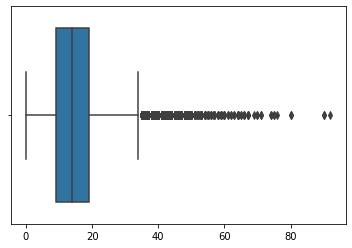

In [ ]:
sns.boxplot([len(sentence) for sentence in all_sentences])
plt.show()

In [43]:
sentences_padded = pad_sequences(all_sentences_numeric, maxlen=MAX_LENGTH, padding="pre", truncating="post")
tags_padded = pad_sequences(all_tags_numeric, maxlen=MAX_LENGTH, padding="pre", truncating="post")

In [44]:
print(sentences_padded[0])
print(tags_padded[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0 23299
 38597  8691 29880 57056 10668 17188  5271 40922 40703 32482 41785 32611
 11858 56681 18026 46864]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 5 4 1 5 5 1 1 4 1 4 4 4 1 4 5 2 4]


In [45]:
word_index["_PAD_"] = 0
word_index["_OOV_"] = 1

tag_index["_PAD_"] = 0

In [46]:
sentences_padded.shape, tags_padded.shape

((39495, 100), (39495, 100))

In [47]:
from tensorflow.keras.utils import to_categorical

In [48]:
y = to_categorical(tags_padded)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentences_padded, y, test_size=0.2, random_state = 24)

In [50]:
X_train.shape

(31596, 100)

In [51]:
X_test.shape

(7899, 100)

In [52]:
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (31596, 100), (31596, 100, 6)
Test Data: (7899, 100), (7899, 100, 6)


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed, Activation, Flatten, Dropout

In [59]:
VOCAB_SIZE = len(word_index)
NUM_CLASSES = len(tag_index)

In [60]:
model = Sequential()

model.add(Embedding(
    input_dim = VOCAB_SIZE,
    output_dim = 128,
    input_length = MAX_LENGTH
))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.25))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.25))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.25))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.25))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))

model.add(TimeDistributed(Dense(NUM_CLASSES, activation="softmax")))

In [61]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          7834880   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 512)          788480    
_________________________________________________________________
dropout (Dropout)            (None, 100, 512)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 512)          1574912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 512)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 256)          656384    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 256)          0

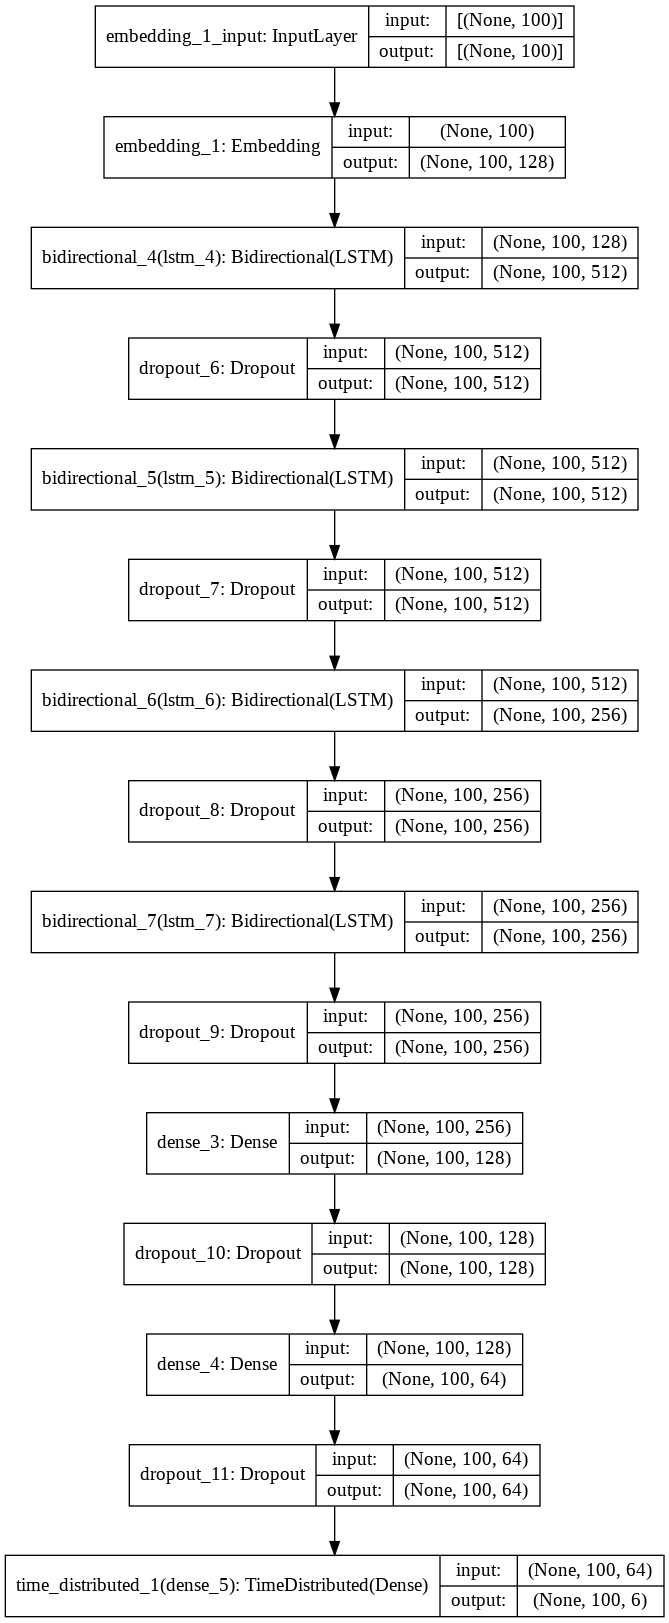

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='h0model.png', show_shapes=True, show_layer_names=True)

In [63]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=20
)

Epoch 1/20
247/247 [==============================] - 64s 216ms/step - loss: 0.2549 - accuracy: 0.9030 - val_loss: 0.2070 - val_accuracy: 0.9162
Epoch 2/20
247/247 [==============================] - 52s 209ms/step - loss: 0.2007 - accuracy: 0.9164 - val_loss: 0.1825 - val_accuracy: 0.9234
Epoch 3/20
247/247 [==============================] - 52s 209ms/step - loss: 0.1103 - accuracy: 0.9616 - val_loss: 0.0696 - val_accuracy: 0.9796
Epoch 4/20
247/247 [==============================] - 52s 209ms/step - loss: 0.0587 - accuracy: 0.9836 - val_loss: 0.0584 - val_accuracy: 0.9834
Epoch 5/20
247/247 [==============================] - 51s 207ms/step - loss: 0.0470 - accuracy: 0.9868 - val_loss: 0.0555 - val_accuracy: 0.9845
Epoch 6/20
247/247 [==============================] - 51s 208ms/step - loss: 0.0397 - accuracy: 0.9885 - val_loss: 0.0535 - val_accuracy: 0.9854
Epoch 7/20
247/247 [==============================] - 51s 207ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.0531 - val_ac

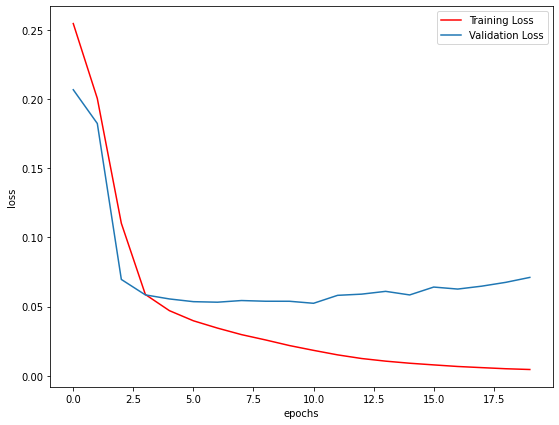

In [64]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'], 'r', label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

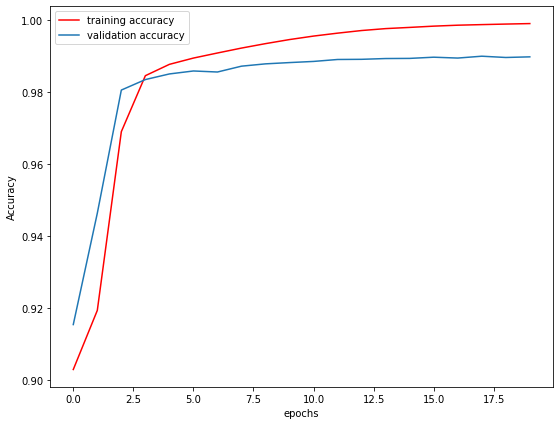

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
pred=model.predict(X_test)

In [71]:
for i in pred[21]:
    print(np.argmax(i), end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 4 1 4 4 2 4 2 4 

In [81]:
prediction=[]
for i in range(0,len(pred)):
  for j in pred[i]:
    prediction.append(np.argmax(j))

In [82]:
test=[]
for i in range(0,len(pred)):
  for j in y_test[i]:
    test.append(np.argmax(j))

In [72]:
for i in y_test[21]:
    print(np.argmax(i), end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 4 1 4 4 2 1 2 4 

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [83]:
print(confusion_matrix(test,prediction))

[[668579      0      0      0      0      0]
 [     0  25793     78    175    816     75]
 [     0     98  13640    385    895    423]
 [     0    174    540   8814    340     74]
 [     0   1066    320    321  49831    447]
 [     0    133    365     65   1189  15264]]


In [89]:
df=confusion_matrix(test,prediction)

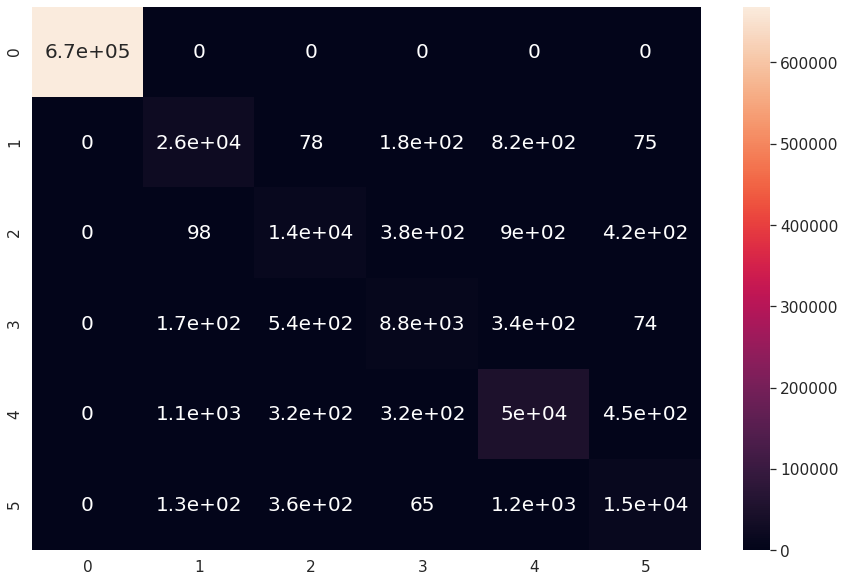

In [97]:
df_cm = pd.DataFrame(df, range(6), range(6))
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 20}) # font size

plt.show()

In [103]:
print(classification_report(test,prediction,target_names=tag_idx))

              precision    recall  f1-score   support

       _PAD_       1.00      1.00      1.00    668579
           a       0.95      0.96      0.95     26937
           n       0.91      0.88      0.90     15441
           r       0.90      0.89      0.89      9942
           u       0.94      0.96      0.95     51985
           v       0.94      0.90      0.92     17016

    accuracy                           0.99    789900
   macro avg       0.94      0.93      0.93    789900
weighted avg       0.99      0.99      0.99    789900



In [ ]:
pred1=model.predict(X_train)

In [ ]:
for i in pred1[50]:
    print(np.argmax(i), end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 4 4 1 4 4 4 2 1 

In [ ]:
for i in y_train[50]:
    print(np.argmax(i), end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 4 4 1 4 4 4 2 1 

In [ ]:
def preprocess_input_text(text, MAXLEN=MAX_LENGTH,word_index=word_index):
    sentence = text.split(" ")
    sentence_numeric = []
    for word in sentence:
        try:
            sentence_numeric.append(word_index[word])
        except:
            sentence_numeric.append(word_index["_OOV_"])
    sentence_numeric = pad_sequences([sentence_numeric], maxlen=MAXLEN, padding="pre",truncating="post")
    return sentence_numeric.reshape((100,))

In [ ]:
x = preprocess_input_text("विजन सिंड्रोम झाल्यावर व्यक्तिची सतत तपासणी करून घेतली पाहिजे. डॉक्टरांच्या सल्ल्याशिवाय कोणतेही औषध डोळ्यांत घालू नये . जर एखाद्या व्यक्तिच्या काकाला , मामाला , बाबांना , तसेच आईला मोतीबिंदू असेल तर नियमित तपासणी केली पाहिजे . मोतीबिंदूने डोळ्यांचा दाब वाढू  शकतो  वज्यामुळे शिरा खराब होऊ शकतात . कित्येक वेळा डोळ्यांमध्ये लवकर मोतीबिंदू होतो .")

In [ ]:
x=x.reshape(1,MAX_LENGTH)

In [ ]:
pred2=model.predict(x)
pred2.shape

(1, 100, 6)

In [ ]:
for i in pred2[0]:
    print(np.argmax(i), end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 2 4 4 4 2 1 4 4 4 3 4 4 2 1 4 5 5 4 4 5 4 5 4 5 3 4 4 2 5 5 4 2 1 4 4 4 4 4 5 2 5 4 4 5 2 1 4 5 4 4 4 4 2 4 

In [100]:
tag_index

{'_PAD_': 0, 'a': 1, 'n': 4, 'r': 3, 'u': 5, 'v': 2}

In [ ]:
model_json = model.to_json()
with open("h3model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("h3model.h5")
print("Saved model to disk")

Saved model to disk


In [3]:
import pickle

In [ ]:
pickle.dump(word_index, open("h3word_index.pkl","wb"))
pickle.dump(tag_index, open("h3pos_index.pkl", "wb"))

In [2]:
from tensorflow.keras.models import model_from_json
with open('h0model.json','r') as f:
    json = f.read()
model = model_from_json(json)
#best m0del weight
model.load_weights("h0model.h5")